In [1]:
# Dataset
import h5py as h5
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Network
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report
from keras.utils import plot_model
from keras import optimizers
from keras import models
from keras import layers


# Plotting
import matplotlib.pyplot as plt

Using TensorFlow backend.


# DATASET

In [2]:
# Load data
dataset_file = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/HDF5/flower17.hdf5'
dataset = h5.File(dataset_file, 'r')

data = np.array(dataset['features'])
labels = np.array(dataset['labels'])
label_names = np.array(dataset['label_names'])

In [3]:
data.shape

(1360, 25088)

In [4]:
labels

array([0, 2, 7, ..., 9, 1, 6])

In [5]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [6]:
labels.shape

(1360, 17)

In [7]:
label_names.shape

(17,)

## Splitting

In [8]:
i = int(labels.shape[0] * 0.50)
j = int(i / 2)


In [9]:
trainX = data[0:i]
trainY = labels[0:i]
trainY.shape

(680, 17)

In [10]:
valX = data[i:i + j]
valY = labels[i:i + j]
valX.shape

(340, 25088)

In [11]:
testX = data[i + j:]
testY = labels[i + j:]
testX.shape

(340, 25088)

# NETWORK

In [12]:
input_shape = (trainX.shape[0:2])
input_shape

(680, 25088)

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, input_shape= (25088,)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
          
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
          
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
          
model.add(layers.Dense(32))
model.add(layers.Activation('relu'))
          
model.add(layers.Dense(17, activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

# ARCHITECTURE

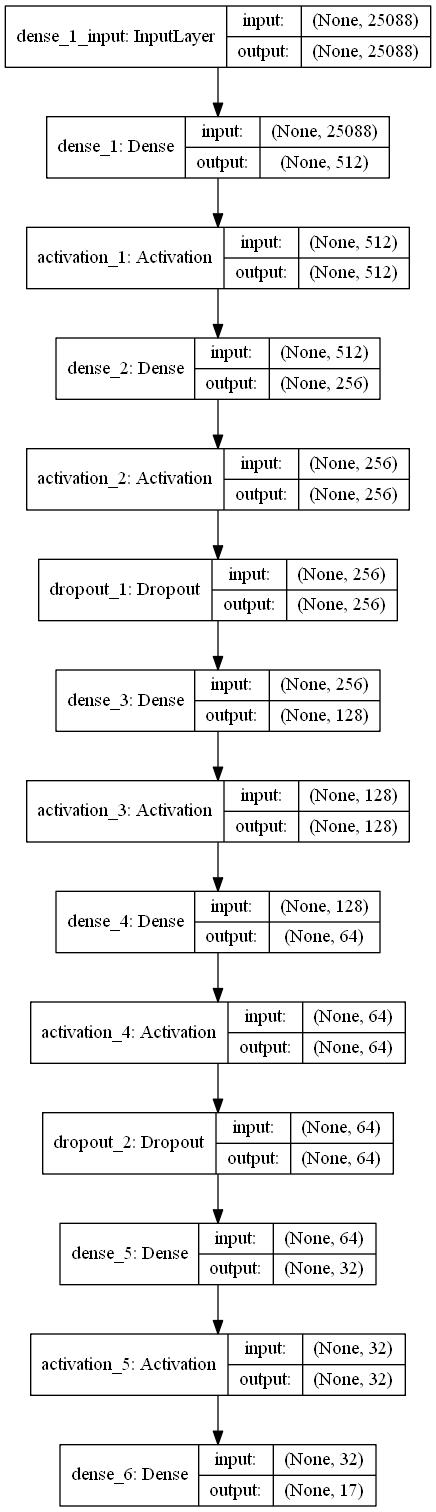

In [14]:
plot_model(model, to_file='serialized/architecture/architecture.jpg', show_shapes=True)

# COMPILATION

## LR scheduling

In [15]:
learning_rate = 0.05

In [16]:
# normal
# opt = SGD(lr=learning_rate)

In [17]:
# time based
# opt_time = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate/100, nesterov=True)

In [18]:
# step decay
def step_decay(epoch):
    initialAlpha = learning_rate
    factor = 0.25
    dropEvery = 5
    
    alpha = initialAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
    
    return float(alpha)

## Compile

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# TRAINING

## Callbacks Registration

In [20]:
callbacks = [LearningRateScheduler(step_decay)]

In [21]:
history = model.fit(trainX, trainY, batch_size=32, epochs=100, validation_data=(valX, valY))

Train on 680 samples, validate on 340 samples
Epoch 1/100
680/680 [==============================] - 2s 3ms/step - loss: 8.5962 - acc: 0.1324 - val_loss: 3.1558 - val_acc: 0.1441
Epoch 2/100
680/680 [==============================] - 1s 2ms/step - loss: 3.4085 - acc: 0.1853 - val_loss: 2.2481 - val_acc: 0.3324
Epoch 3/100
680/680 [==============================] - 1s 2ms/step - loss: 2.8398 - acc: 0.2544 - val_loss: 2.7576 - val_acc: 0.2588
Epoch 4/100
680/680 [==============================] - 1s 2ms/step - loss: 2.4688 - acc: 0.3485 - val_loss: 1.9291 - val_acc: 0.4088
Epoch 5/100
680/680 [==============================] - 1s 2ms/step - loss: 2.2347 - acc: 0.4059 - val_loss: 1.7702 - val_acc: 0.4941
Epoch 6/100
680/680 [==============================] - 2s 3ms/step - loss: 1.7559 - acc: 0.4897 - val_loss: 1.6364 - val_acc: 0.5118
Epoch 7/100
680/680 [==============================] - 3s 4ms/step - loss: 1.5532 - acc: 0.5691 - val_loss: 1.5404 - val_acc: 0.5735
Epoch 8/100
680/680 [==

# Plotting

In [22]:
history_dict = history.history
epochs = np.arange(1, len(history_dict['acc']) + 1)

accuracy = history_dict['acc']
val_acc = history_dict['val_acc']

loss=history_dict['loss']
val_loss = history_dict['val_loss']

## Accuracy

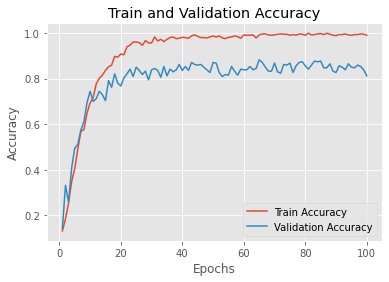

In [23]:
plt.style.use('ggplot')
plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

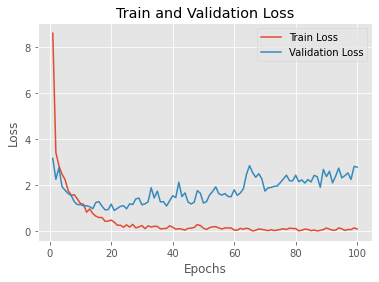

In [24]:
plt.clf()
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation

In [25]:
result = model.evaluate(testX, testY)
result

340/340 [==============================] - 0s 532us/step


[1.6383856766364153, 0.8470588326454163]

# PREDICTION

In [26]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))

              precision    recall  f1-score   support

    Bluebell       0.82      0.88      0.85        16
   Buttercup       0.86      0.82      0.84        22
       Colts       0.91      1.00      0.95        21
     Cowslip       0.90      0.43      0.58        21
      Crocus       0.67      0.95      0.78        19
     Daffodi       0.79      0.71      0.75        21
       Daisy       1.00      0.95      0.97        20
   Dandelion       1.00      0.83      0.91        18
  Fritillary       1.00      1.00      1.00        16
        Iris       1.00      0.91      0.95        23
        Lily       0.94      0.68      0.79        25
       Pansy       0.89      0.81      0.85        21
    Snowdrop       0.87      0.87      0.87        23
   Sunflower       1.00      0.96      0.98        23
   Tigerlily       0.94      1.00      0.97        16
       Tulip       0.63      0.79      0.70        24
  Windflower       0.48      1.00      0.65        11

    accuracy              

# OBSERVATIONS